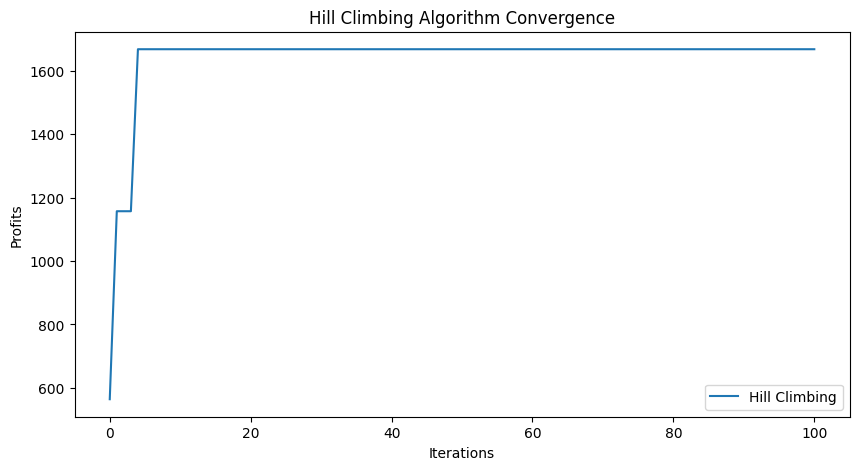

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 背包問題數據
capacity = 170
weights = np.array([41, 50, 49, 59, 55, 57, 60])
profits = np.array([442, 525, 511, 593, 546, 564, 617])

# 計算給定解的總利潤和總重量
def calculate_profit_and_weight(solution):
    total_profit = np.dot(solution, profits)
    total_weight = np.dot(solution, weights)
    return total_profit, total_weight

# 爬山演算法的目標函數
def hill_climbing_fitness(solution):
    total_profit, total_weight = calculate_profit_and_weight(solution)
    if total_weight <= capacity:
        return total_profit
    else:
        return 0

# 生成隨機初始解
def generate_initial_solution():
    return np.random.randint(2, size=len(weights))

# 獲取鄰居解
def get_neighbor(solution):
    neighbor = solution.copy()
    idx_to_flip = random.randint(0, len(neighbor) - 1)
    neighbor[idx_to_flip] = 1 - neighbor[idx_to_flip]
    return neighbor

# 爬山演算法
def hill_climbing(max_iterations):
    current_solution = generate_initial_solution()
    current_fitness = hill_climbing_fitness(current_solution)
    history = [current_fitness]

    for iteration in range(max_iterations):
        neighbor = get_neighbor(current_solution)
        neighbor_fitness = hill_climbing_fitness(neighbor)

        if neighbor_fitness > current_fitness:
            current_solution = neighbor
            current_fitness = neighbor_fitness

        history.append(current_fitness)

    return history

# 執行爬山演算法並畫出收斂圖
iterations = 100
hc_history = hill_climbing(iterations)

# 畫出收斂圖
plt.figure(figsize=(10, 5))
plt.plot(hc_history, label='Hill Climbing')
plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.title('Hill Climbing Algorithm Convergence')
plt.legend()
plt.show()


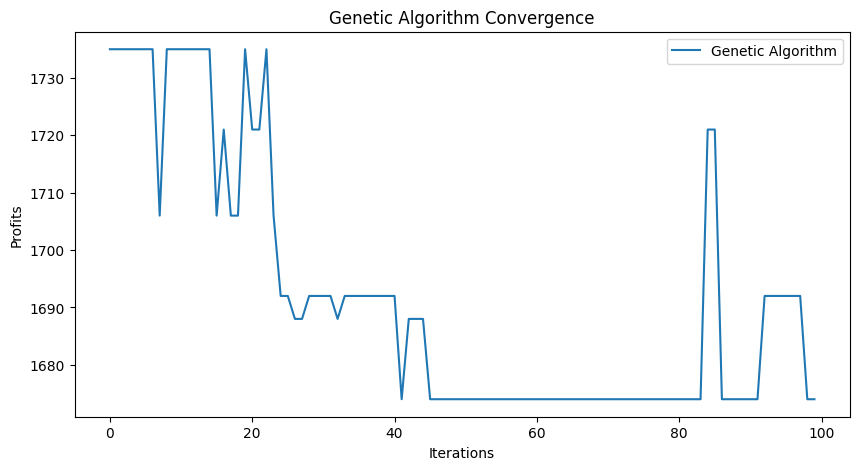

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 背包問題數據
capacity = 170
weights = np.array([41, 50, 49, 59, 55, 57, 60])
profits = np.array([442, 525, 511, 593, 546, 564, 617])

# 計算給定解的總利潤和總重量
def calculate_profit_and_weight(solution):
    total_profit = np.dot(solution, profits)
    total_weight = np.dot(solution, weights)
    return total_profit, total_weight

# 基因演算法的適應度函數
def ga_fitness(solution):
    total_profit, total_weight = calculate_profit_and_weight(solution)
    if total_weight <= capacity:
        return total_profit
    else:
        return -1  # 這樣可以確保超重的解不被選擇

# 選擇函數（輪盤賭選擇）
def roulette_wheel_selection(population, fitnesses):
    max_val = sum(fitnesses)
    pick = random.uniform(0, max_val)
    current = 0
    for solution, fitness in zip(population, fitnesses):
        current += fitness
        if current > pick:
            return solution

# 交配函數（單點交叉）
def crossover(parent_1, parent_2):
    crossover_idx = random.randint(1, len(parent_1) - 1)
    child_1 = np.concatenate([parent_1[:crossover_idx], parent_2[crossover_idx:]])
    child_2 = np.concatenate([parent_2[:crossover_idx], parent_1[crossover_idx:]])
    return child_1, child_2

# 突變函數
def mutate(solution, mutation_rate):
    for i in range(len(solution)):
        if random.random() < mutation_rate:
            solution[i] = 1 - solution[i]  # 進行基因突變
    return solution

# 創建初始人口
def create_initial_population(population_size):
    return [generate_initial_solution() for _ in range(population_size)]

# 基因演算法的主函數
def genetic_algorithm(population_size, max_iterations, mutation_rate):
    # 生成初始人口
    population = create_initial_population(population_size)
    history = []

    for iteration in range(max_iterations):
        # 計算當前人口的適應度
        fitnesses = [ga_fitness(solution) for solution in population]
        next_generation = []

        # 選擇和創建下一代
        for _ in range(population_size // 2):
            # 選擇兩個父代
            parent_1 = roulette_wheel_selection(population, fitnesses)
            parent_2 = roulette_wheel_selection(population, fitnesses)

            # 交配創建子代
            child_1, child_2 = crossover(parent_1, parent_2)

            # 突變子代
            child_1 = mutate(child_1, mutation_rate)
            child_2 = mutate(child_2, mutation_rate)

            # 添加到下一代
            next_generation.extend([child_1, child_2])

        # 更新人口
        population = next_generation

        # 記錄最佳解
        best_fitness = max(fitnesses)
        history.append(best_fitness)

        # 如果找到了最佳解，終止演算法
        if best_fitness == max(profits):
            break

    return history

# 執行基因演算法
population_size = 100
max_iterations = 100
mutation_rate = 0.01
ga_history = genetic_algorithm(population_size, max_iterations, mutation_rate)

# 繪製基因演算法的收斂圖
plt.figure(figsize=(10, 5))
plt.plot(ga_history, label='Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.title('Genetic Algorithm Convergence')
plt.legend()
plt.show()
